mkdir: cannot create directory ‘/root/.kaggle’: File exists
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/achmadnoer/alfabet-bisindo
License(s): CC0-1.0
alfabet-bisindo.zip: Skipping, found more recently modified local copy (use --force to force download)


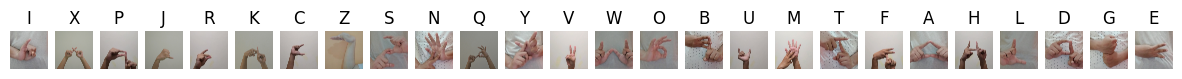

['image_data.pkl']

In [ ]:

import numpy as np
import os
import PIL
import PIL.Image
import pathlib
import pandas as pd
import joblib
import cv2
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from torchvision import transforms
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from skimage.color import rgb2gray
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from PIL import Image
import zipfile
from matplotlib import gridspec

!pip install -q kaggle
!mkdir ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d 'achmadnoer/alfabet-bisindo'
dataset_zip = zipfile.ZipFile('/content/alfabet-bisindo.zip')
dataset_zip.extractall()
dataset_zip.close()
dir_path = '/content/Citra BISINDO'
image_paths = []
labels = []

# Define the allowed classes
# allowed_classes = {'A', 'I', 'U', 'E', 'O'}

# Gather image paths and labels
for dirname, _, filenames in os.walk(dir_path):
    label = os.path.basename(dirname)
    # if label in allowed_classes:  # Only process allowed classes
    for filename in filenames:
        image_path = os.path.join(dirname, filename)
        image_paths.append(image_path)
        labels.append(label)

# Create DataFrame
df = pd.DataFrame({
    'path': image_paths,
    'label': labels
})

# Shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)

# Plot images for each class
unique_labels = df['label'].unique()
num_labels = len(unique_labels)

fig = plt.figure(figsize=(15, 4))
gs = gridspec.GridSpec(1, num_labels)

for i, label in enumerate(unique_labels):
    # Get paths of images for the current label
    label_paths = df[df['label'] == label]['path'].tolist()

    # Plot images for the current label
    ax = plt.subplot(gs[i])
    ax.set_title(label)
    ax.axis('off')

    if label_paths:  # Check if there are images for this label
        # Display the first image for the current label
        img = Image.open(label_paths[0])  # Open the image
        ax.imshow(img)
    else:
        ax.text(0.5, 0.5, 'No images', horizontalalignment='center', verticalalignment='center', fontsize=12, transform=ax.transAxes)

plt.show()

def process_images(df):
    data = {'images': [], 'labels': []}
    for i, row in df.iterrows():
        # Open the image
        img = Image.open(row['path'])

        # Convert the image to RGB (if not already in RGB)
        img = img.convert('RGB')

        # Convert PIL image to numpy array
        img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

        # Resize the image to have a width and height of 80 pixels
        img = cv2.resize(img, (80, 80))

        data['images'].append(img)
        data['labels'].append(row['label'])
    return data

# Process images and save data dictionary to a pickle file using joblib
data = process_images(df)
joblib.dump(data, 'image_data.pkl')


In [ ]:
# lihat jumlah data per kelas
labels = data['labels']
unique_labels, counts = np.unique(labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Label: {label}, Count: {count}")


Label: A, Count: 12
Label: B, Count: 12
Label: C, Count: 12
Label: D, Count: 12
Label: E, Count: 12
Label: F, Count: 12
Label: G, Count: 12
Label: H, Count: 12
Label: I, Count: 12
Label: J, Count: 12
Label: K, Count: 12
Label: L, Count: 12
Label: M, Count: 12
Label: N, Count: 12
Label: O, Count: 12
Label: P, Count: 12
Label: Q, Count: 12
Label: R, Count: 12
Label: S, Count: 12
Label: T, Count: 12
Label: U, Count: 12
Label: V, Count: 12
Label: W, Count: 12
Label: X, Count: 12
Label: Y, Count: 12
Label: Z, Count: 12


Images for class: A


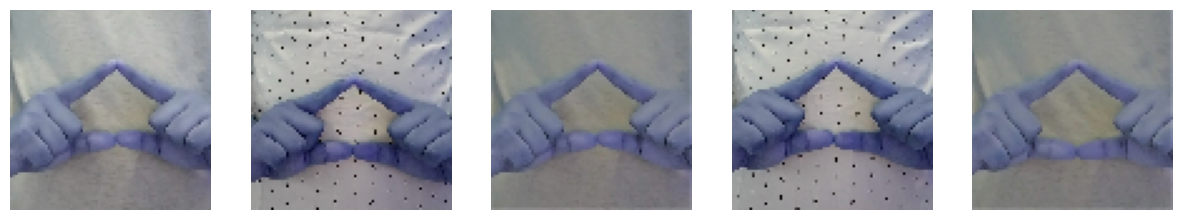

Images for class: B


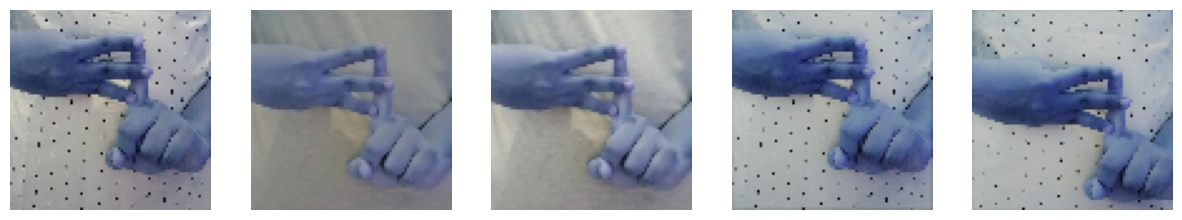

Images for class: C


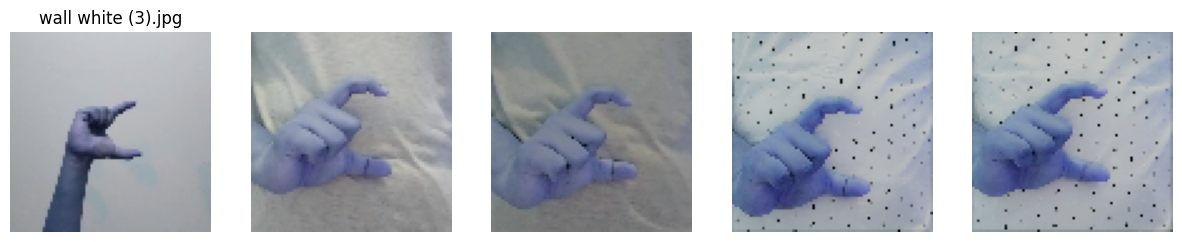

Images for class: D


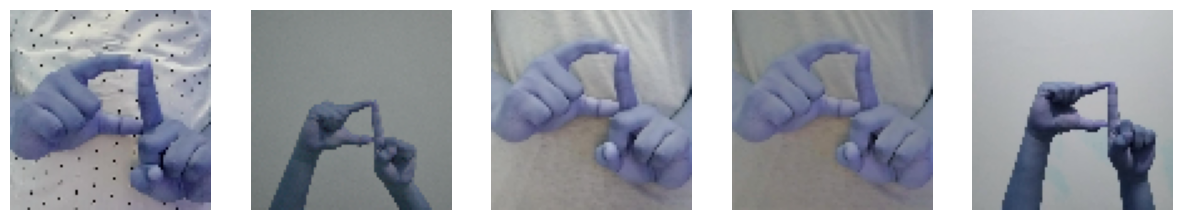

Images for class: E


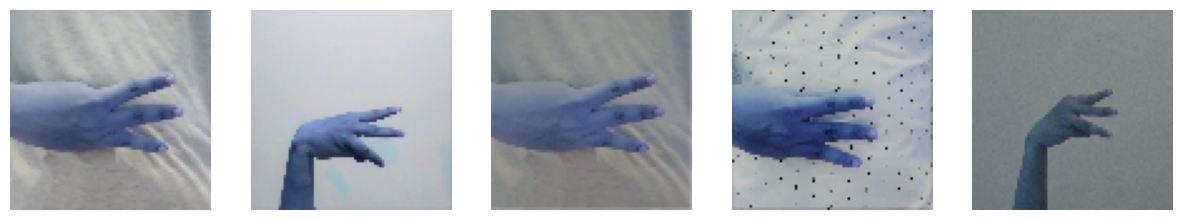

Images for class: F


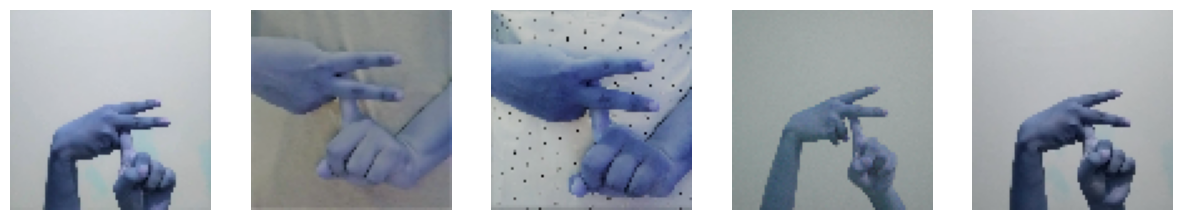

Images for class: G


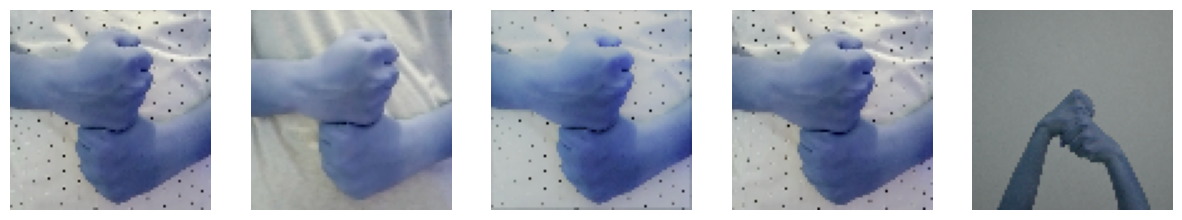

Images for class: H


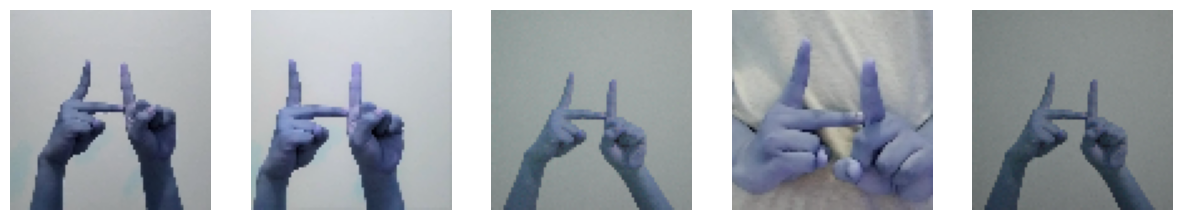

Images for class: I


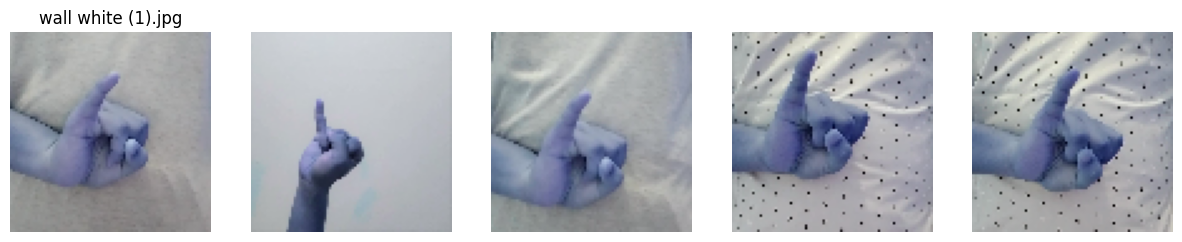

Images for class: J


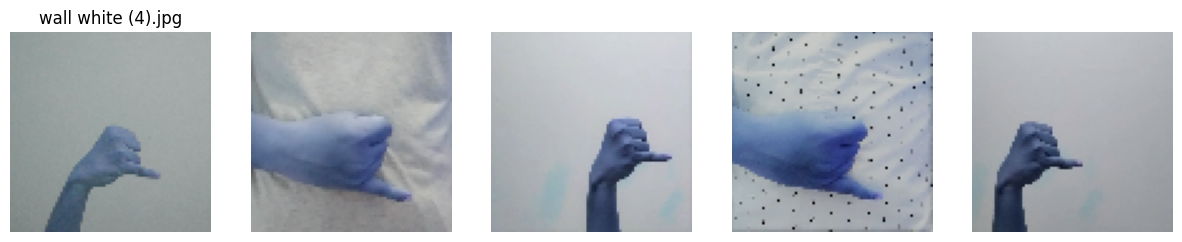

Images for class: K


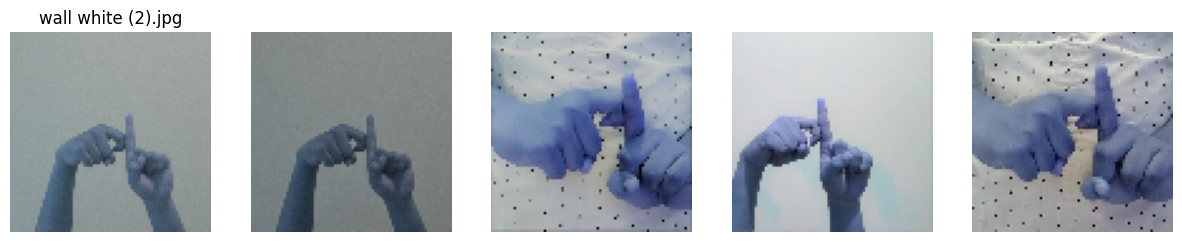

Images for class: L


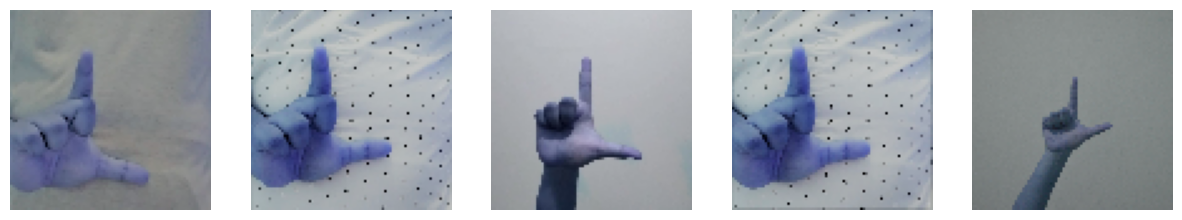

Images for class: M


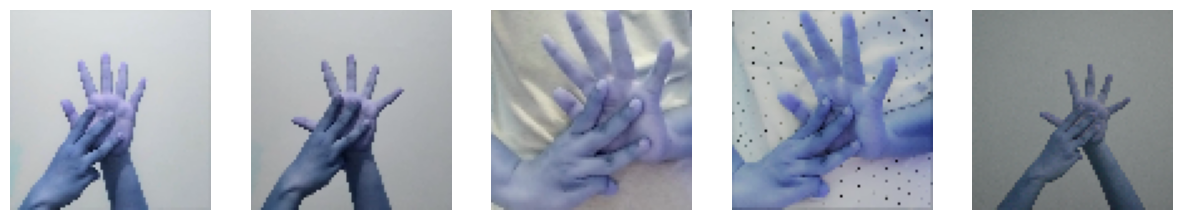

Images for class: N


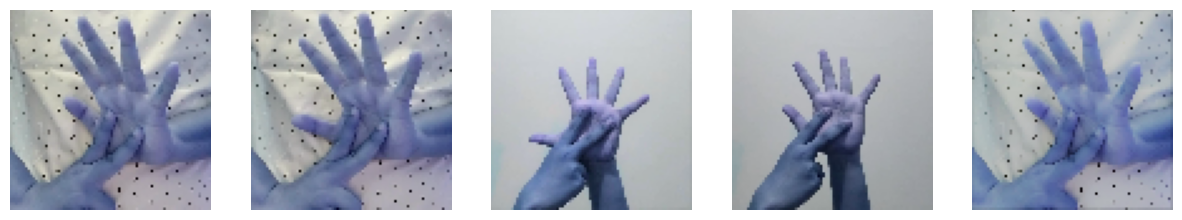

Images for class: O


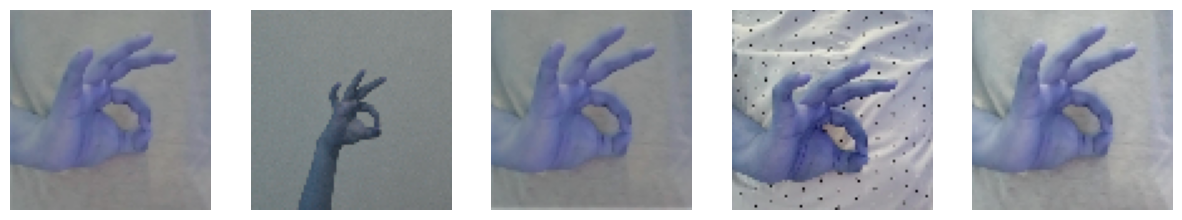

Images for class: P


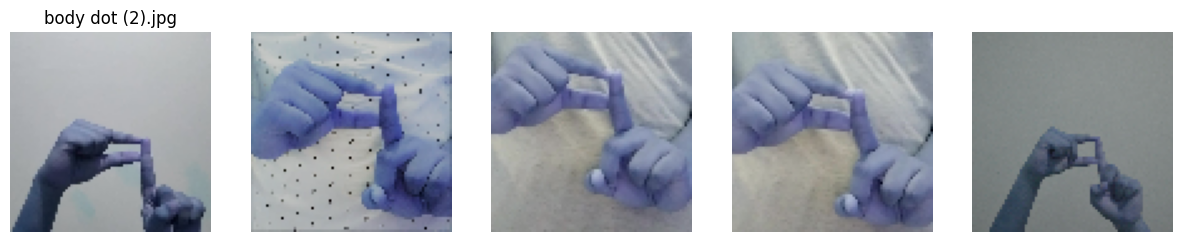

Images for class: Q


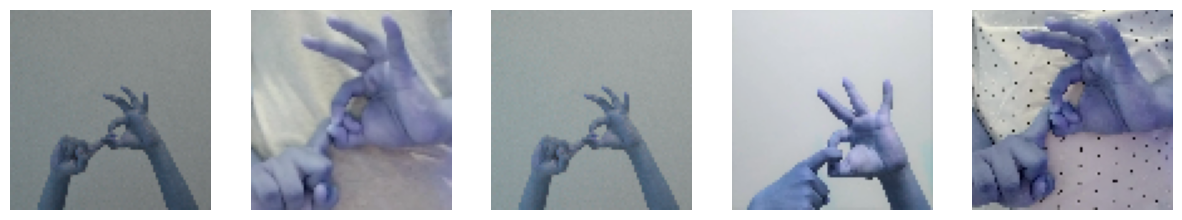

Images for class: R


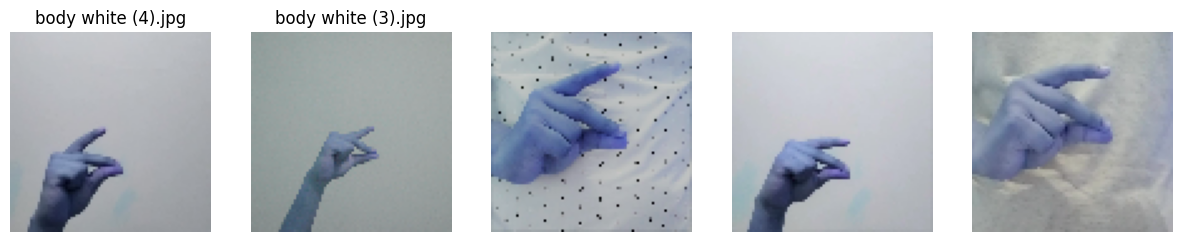

Images for class: S


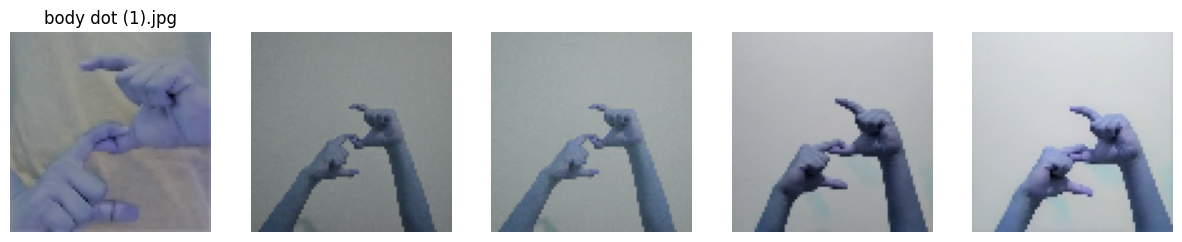

Images for class: T


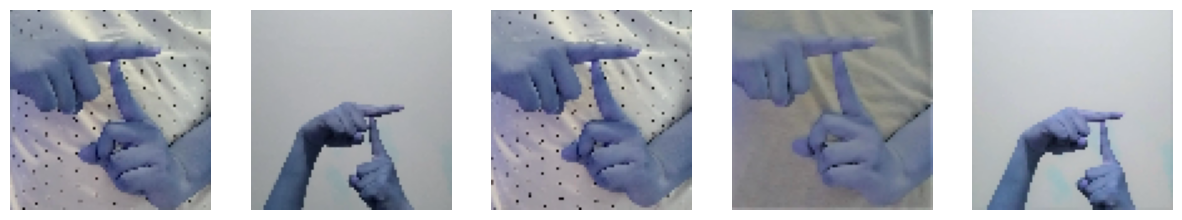

Images for class: U


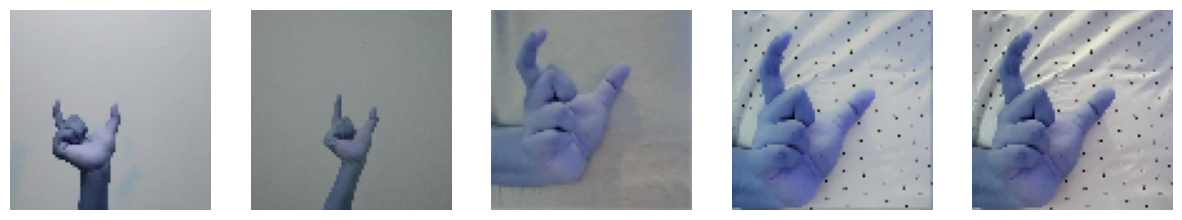

Images for class: V


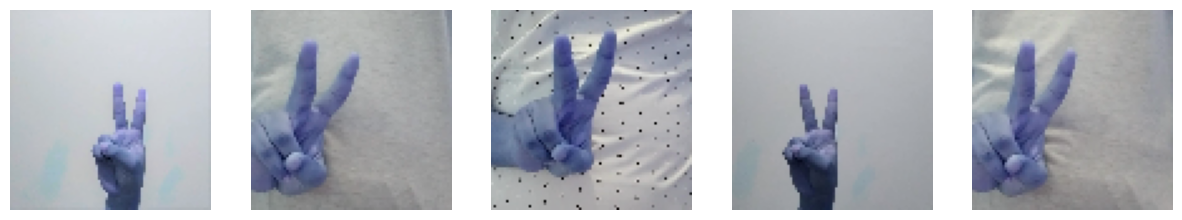

Images for class: W


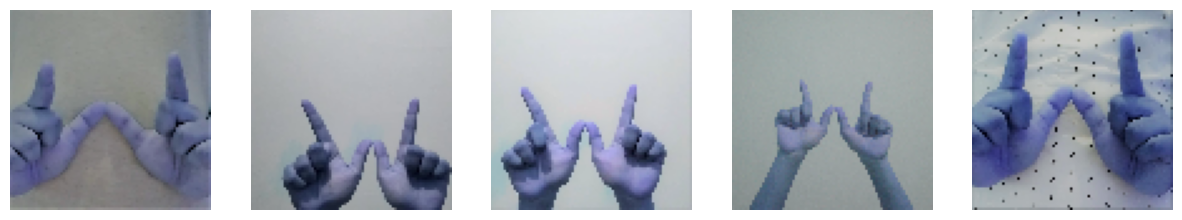

Images for class: X


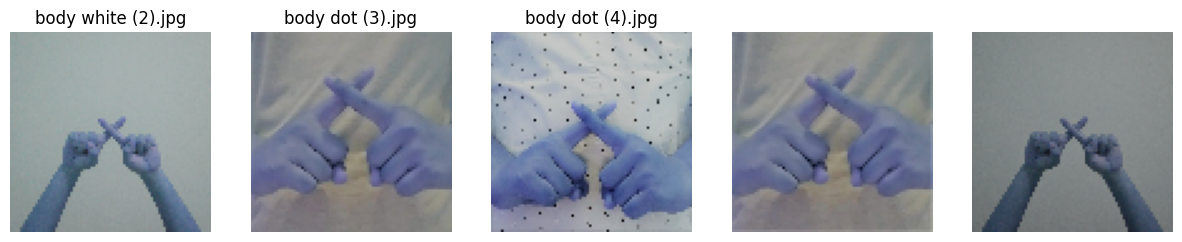

Images for class: Y


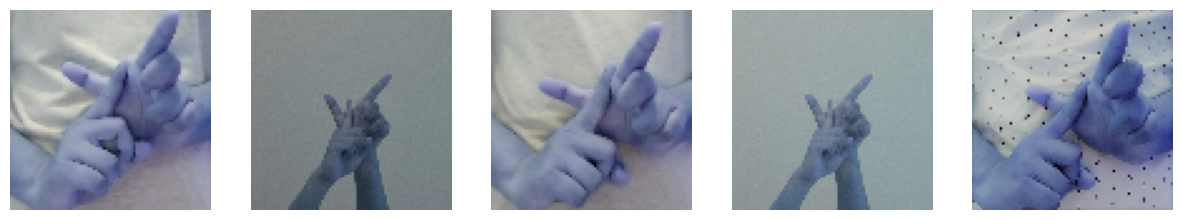

Images for class: Z


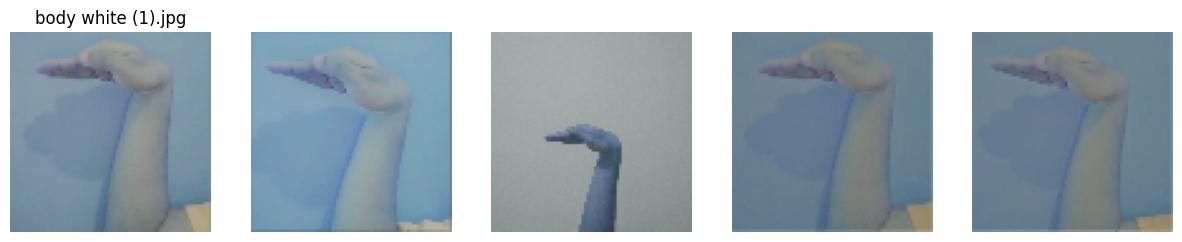

In [ ]:
# Load the processed image data from the pickle file
data = joblib.load('image_data.pkl')

# Extract labels and images from the data
labels = data['labels']
images = data['images']

# Get unique labels
unique_labels = np.unique(labels)

# Plot images for each class
for label in unique_labels:
    print(f"Images for class: {label}")
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # Adjust the number of subplots as needed
    axes = axes.flatten()

    # Get indices of images corresponding to the current class
    indices = [i for i, l in enumerate(labels) if l == label]

    # Plot the images
    for i, idx in enumerate(indices[:min(5, len(indices))]):  # Plot up to 5 images for each class
        axes[i].imshow(images[idx])
        axes[i].set_title(filenames[idx] if idx < len(filenames) else '')  # Show filename as title
        axes[i].axis('off')

    plt.show()


In [ ]:
X = np.array(data['images'])  # Assuming 'images' contains the input data
y = np.array(data['labels'])  # Assuming 'labels' contains the corresponding labels


In [ ]:
# lihat jumlah datanya

print(f"Number of data points: {len(X)}")


Number of data points: 312


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    # shuffle=True,  # Shuffle the data before splitting
    # random_state=42,  # Seed for reproducibility
)


In [ ]:
# lihat jumlah dtanya masing masing

# Print the number of data points in each set
print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")


Number of training samples: 218
Number of testing samples: 94


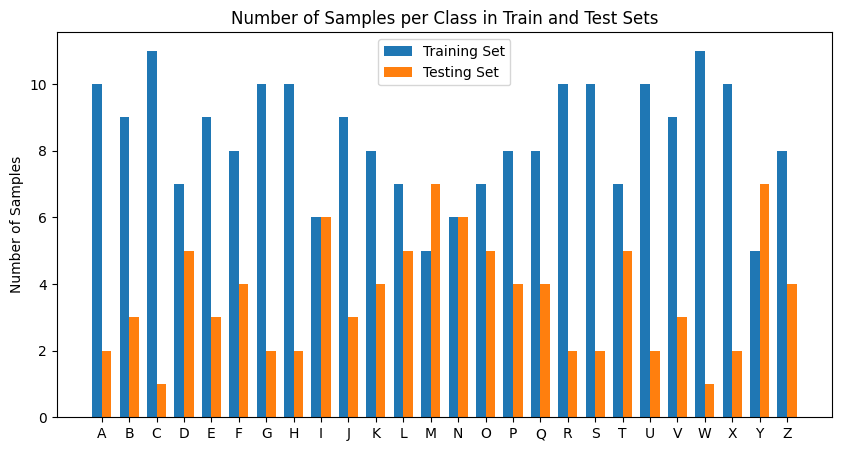

In [ ]:
# prompt: visulisasikan  jumlah train test per kelas

import numpy as np
import matplotlib.pyplot as plt

# Count the number of occurrences of each label in the training and testing sets
train_counts = {}
test_counts = {}
for label in unique_labels:
    train_counts[label] = len(y_train[y_train == label])
    test_counts[label] = len(y_test[y_test == label])

# Create a bar chart to visualize the number of samples per class in each set
fig, ax = plt.subplots(figsize=(10, 5))

bar_width = 0.35
x_pos = np.arange(len(unique_labels))

rects1 = ax.bar(x_pos - bar_width / 2, train_counts.values(), bar_width, label='Training Set')
rects2 = ax.bar(x_pos + bar_width / 2, test_counts.values(), bar_width, label='Testing Set')

ax.set_xticks(x_pos)
ax.set_xticklabels(unique_labels)

ax.set_ylabel('Number of Samples')
ax.set_title('Number of Samples per Class in Train and Test Sets')
ax.legend()

plt.show()


In [ ]:
# Custom transformer to convert RGB images to grayscale
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.array([rgb2gray(img) for img in X])
# Custom transformer to calculate HOG features
class HOGTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        hog_features = []
        for img in X:
            _, hog_feature = hog(img, orientations=self.orientations, pixels_per_cell=self.pixels_per_cell,
                                 cells_per_block=self.cells_per_block, block_norm=self.block_norm, visualize=True)
            hog_features.append(hog_feature.flatten())  # Flatten HOG features
        return np.array(hog_features)


# Create a pipeline with the custom transformers and StandardScaler
pipeline = Pipeline([
    ('gray', RGB2GrayTransformer()),
    ('hog', HOGTransformer())
])

# Fit the pipeline on training data and transform both training and test data
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the SVM model
svm_clf = SVC()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Create an instance of GridSearchCV
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy')

# Train the classifier by calling the fit method with training data and labels
grid_search.fit(X_train_transformed, y_train)

# Best parameters found by GridSearchCV
print("Best parameters: ", grid_search.best_params_)

# Best estimator found by GridSearchCV
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_transformed)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: ", test_accuracy)


Best parameters:  {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Test set accuracy:  0.776595744680851


In [ ]:
X_test_gray = RGB2GrayTransformer().transform(X_test)
X_test_hog = HOGTransformer().transform(X_test_gray)
X_test_prepared = StandardScaler().fit_transform(X_test_hog)

# Make predictions on the test set using the best model found by GridSearchCV
y_pred = best_model.predict(X_test_prepared)

# Print the first 25 predictions and calculate the percentage correct
print(np.array(y_pred == y_test))
print('')
print('Percentage correct:', 100 * np.sum(y_pred == y_test) / len(y_test))

[ True  True False  True  True  True  True False  True False False  True
  True  True False False  True  True  True  True  True False  True  True
 False  True False  True  True False  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True False  True  True False
  True  True  True  True  True  True  True False False  True  True  True
  True  True  True  True  True False  True  True  True False  True  True
 False False False  True  True  True  True  True  True  True]

Percentage correct: 77.65957446808511


<IPython.core.display.Javascript object>

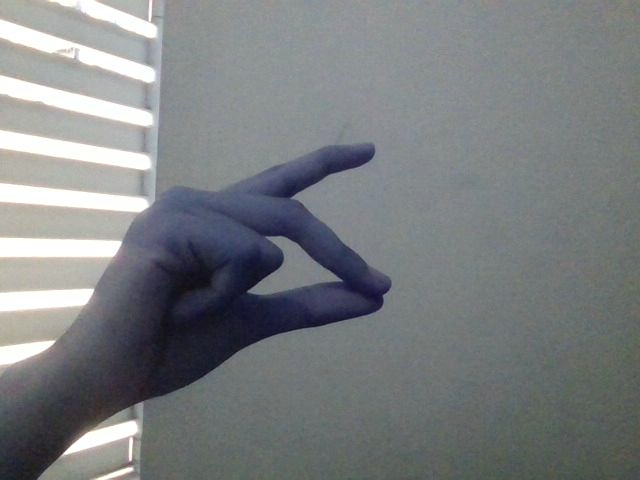

Prediksi: R


In [ ]:
# Install PyWavelets package if not already installed
!pip install pywavelets

from IPython.display import display, Javascript
from google.colab.output import eval_js
import cv2
import numpy as np
import base64
import pywt
from PIL import Image

# Convert JS image data to OpenCV image
def js_to_image(js_data):
    """
    Converts a base64 data string from JavaScript to an OpenCV image
    """
    image_bytes = base64.b64decode(js_data.split(',')[1])
    image_array = np.frombuffer(image_bytes, dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
    return image

# Convert OpenCV image to base64
def image_to_base64(img):
    _, buffer = cv2.imencode('.jpg', img)
    img_str = base64.b64encode(buffer).decode('utf-8')
    return 'data:image/jpeg;base64,' + img_str

# JavaScript code to capture video and return the processed image data
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)

  # Save image
  cv2.imwrite(filename, img)

  # Display the captured image
  display(Image.fromarray(img))

  return filename

# Take a photo and display the result
filename = take_photo()

nama_file_gambar = filename
image = Image.open(nama_file_gambar)
ukuran_yang_diharapkan = (80,80)
image = image.resize(ukuran_yang_diharapkan)
image_array = np.array(image)
image_array = image_array.reshape((1, 80,80,3))
test_image_prepared = pipeline.transform(image_array)
prediction = grid_search.best_estimator_.predict(test_image_prepared)[0]

# Tampilkan prediksi
print("Prediksi:", prediction)
